In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
%matplotlib inline

In [4]:
files = np.sort(glob.glob('./NWS/*.txt'))
df_list = []
for file_name in files:
    df = pd.read_table(file_name,  comment='#', names=['bottom_age', 'bottom_depth', 'min_water_depth', 'max_water_depth', 'lithology'], delim_whitespace=True, usecols=[0,1,2,3, 4])
    df_list.append(df)

In [8]:
cmap = plt.get_cmap('rainbow')
norm = mcolors.Normalize(vmin=0, vmax=(len(files))-1)

timestep=np.arange(0,len(files),1)
def get_colour(timestep):
    return cmap(norm(timestep))
c=cmap(norm(timestep))

Text(0, 0.5, 'Depth Below Sea Floor (m)')

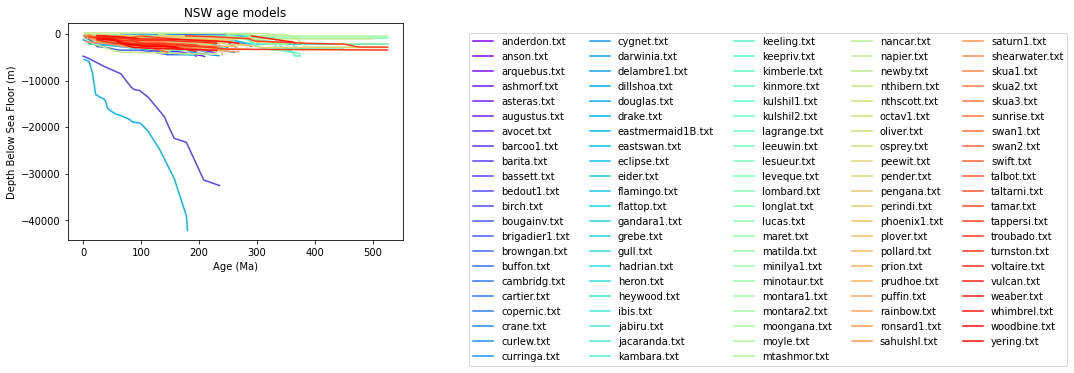

In [19]:
for i in np.arange(0,len(df_list),1):
    plt.plot(df_list[i]['bottom_age'], df_list[i]['bottom_depth']*-1, label=files[i+1], c=c[i])
plt.legend(loc='lower right',bbox_to_anchor=(3, -0.6), ncol=5)
plt.title('NSW age models')
plt.xlabel('Age (Ma)')
plt.ylabel('Depth Below Sea Floor (m)')

Text(0, 0.5, 'maximum Hole Penetration Depth Below Sea Floor (m)')

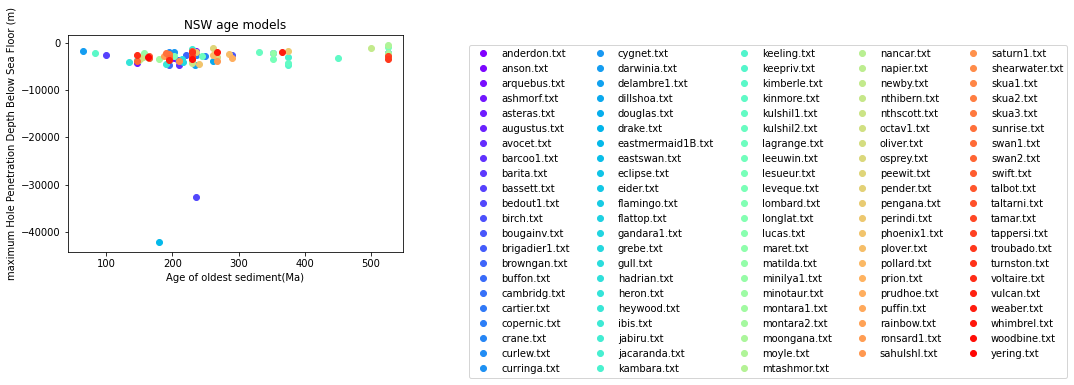

In [20]:
files=np.sort(os.listdir('./NWS'))

for i in np.arange(0,len(df_list),1):
    plt.plot(np.max(df_list[i]['bottom_age']), np.max(df_list[i]['bottom_depth'])*-1,'o', label=files[i+1], c=c[i])
plt.legend(loc='lower right',bbox_to_anchor=(3, -0.6), ncol=5)
plt.title('NSW age models')
plt.xlabel('Age of oldest sediment(Ma)')
plt.ylabel('maximum Hole Penetration Depth Below Sea Floor (m)')


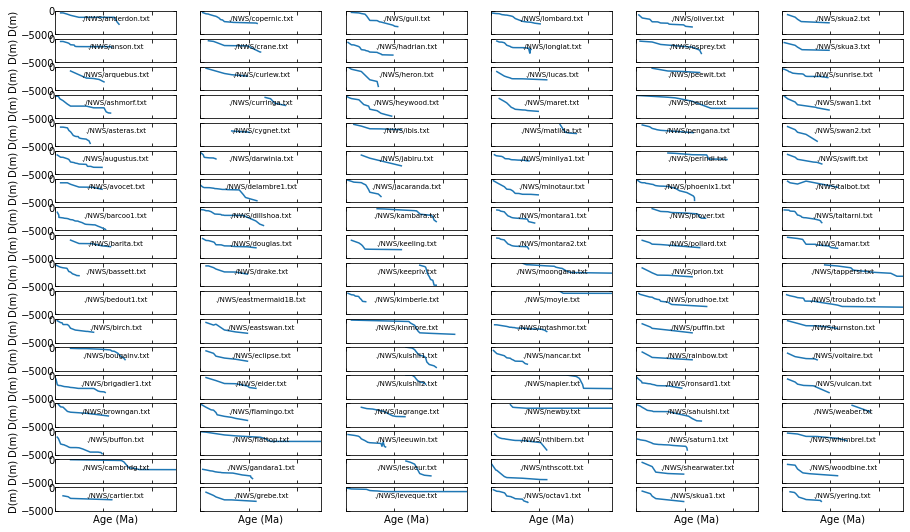

In [23]:
nrows=18
ncols=6
fs=7
files = np.sort(glob.glob('./NWS/*.txt'))

fig, axs = plt.subplots(nrows,ncols, figsize=(38/2.5, 23/2.5), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i in np.arange(0,nrows*ncols,nrows): # There are 5 rows so this controls that the file number gets loaded in multiples of 5
    for f in np.arange(0,nrows,1):#This controls the row number 
            ax = axs[f,int(i/nrows)] 
            ax.set_xlim(0,500)
            ax.set_ylim(-5000,0)
#             print(f+i)
            ax.plot(df_list[f+i]['bottom_age'], df_list[f+i]['bottom_depth']*-1)#, '-o', c='r', markersize=ms)
            ax.tick_params(axis='both', which='both', direction='in', labelbottom=False, pad=0.1, top=True, right=True)
            ax.set_title(str(files[f+i]), pad=-10, fontsize=fs)
            ax.set_ylabel('D(m)')
            ax.set_xlabel('Age (Ma)')    
for ax in axs.flat:
    ax.label_outer()

In [ ]:
# I need to do a different filter e.g. all wells that span the Cretaceous and younger 
#And also do the plots in an interactive way, the legend doesn't really help
